# Clean Data

In [389]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [390]:
DATA_RAW_DIR = os.path.normpath('../data/raw')
DATA_PROCESSED_DIR = os.path.normpath('../data/processed')

In [391]:
df = pd.read_csv(os.path.join(DATA_RAW_DIR, 'data.csv'))
X = df.copy(deep=True).drop(columns='diagnosis')
y = df.diagnosis
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [392]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [393]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Target feature is unbalanced.

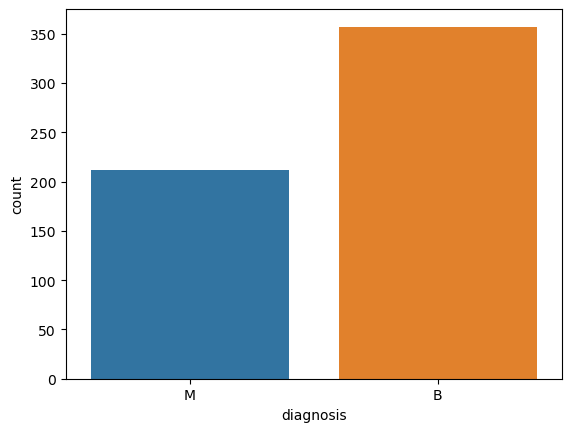

In [394]:
sns.countplot(x=y)
plt.show()

# Undersampling

In [395]:
from imblearn.under_sampling import RandomUnderSampler

In [396]:
sampler = RandomUnderSampler(random_state=42)
X, y = sampler.fit_resample(X, y)

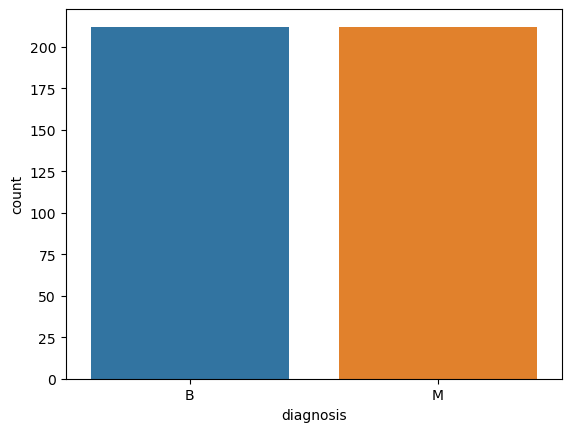

In [397]:
sns.countplot(x=y)
plt.show()

In [398]:
X = X.dropna(axis=1) \
           .drop(columns=['id']) # id is not a relevant variable
# df_p = pd.get_dummies(df_p)
y = y.replace(['M', 'B'], ['1', '0'])
df_p

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,0.311915,0.252621,0.297253,0.188235,0.177817,0.104994,0.062816,0.161581,0.293434,0.161752,...,0.213156,0.114356,0.233969,0.092955,0.067572,0.271856,0.188843,0.072478,1,0
1,0.102160,0.246195,0.103330,0.051403,0.408266,0.198331,0.101546,0.088370,0.264646,0.435762,...,0.087388,0.035580,0.498778,0.144764,0.103834,0.183299,0.190814,0.194412,1,0
2,0.304080,0.322286,0.289994,0.185575,0.172465,0.103920,0.070173,0.102883,0.262121,0.125948,...,0.253724,0.150581,0.232649,0.110807,0.133626,0.280069,0.155924,0.137675,1,0
3,0.233557,0.105512,0.219542,0.131683,0.111111,0.064567,0.016806,0.057107,0.279293,0.214195,...,0.146154,0.077015,0.153338,0.036363,0.013371,0.092096,0.140942,0.099961,1,0
4,0.196826,0.235374,0.190293,0.108642,0.422143,0.127508,0.084161,0.129225,0.140909,0.199874,...,0.160998,0.080166,0.369346,0.073260,0.083546,0.239450,0.028977,0.120622,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.647877,0.520122,0.676203,0.504849,0.469719,0.626403,0.743674,0.732604,0.550000,0.396588,...,0.633471,0.395842,0.459156,0.379651,0.527077,0.873540,0.268874,0.286567,0,1
420,0.679220,0.428813,0.669086,0.561486,0.480622,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.567383,0.447449,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0,1
421,0.609188,0.626987,0.592229,0.467948,0.349787,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.510955,0.374008,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0,1
422,0.436309,0.621238,0.429263,0.295074,0.218456,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.367089,0.223402,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0,1


# Scaling data

In [399]:
from sklearn.preprocessing import MinMaxScaler

In [400]:
# sc_X = MinMaxScaler()
# sc_X.fit(X)
# X = pd.DataFrame(sc_X.transform(X), columns=X.columns)

# PCA

In [401]:
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.310160,0.997721,0.988081,0.189601,0.504577,0.672740,0.824131,0.141487,-0.306457,...,0.966183,0.276109,0.961799,0.939116,0.127465,0.374167,0.497335,0.726803,0.139735,-0.031473
texture_mean,0.310160,1.000000,0.314764,0.301619,-0.029535,0.213825,0.265356,0.262807,0.065073,-0.084629,...,0.334459,0.902844,0.340338,0.321342,0.072451,0.250187,0.267407,0.259175,0.094849,0.092624
perimeter_mean,0.997721,0.314764,1.000000,0.986686,0.229615,0.556884,0.713213,0.853377,0.181057,-0.254437,...,0.965746,0.281498,0.967160,0.938751,0.160293,0.418037,0.535975,0.755148,0.167350,0.013158
area_mean,0.988081,0.301619,0.986686,1.000000,0.190829,0.490655,0.676824,0.819397,0.139194,-0.285005,...,0.957959,0.259772,0.954254,0.954689,0.122273,0.346974,0.479498,0.700776,0.111837,-0.038604
smoothness_mean,0.189601,-0.029535,0.229615,0.190829,1.000000,0.695635,0.586398,0.591939,0.545782,0.622370,...,0.234967,0.052082,0.265612,0.220452,0.816281,0.523978,0.509120,0.561167,0.412652,0.543451
compactness_mean,0.504577,0.213825,0.556884,0.490655,0.695635,1.000000,0.886641,0.833724,0.640477,0.573860,...,0.532788,0.237511,0.591140,0.500258,0.592604,0.866781,0.825185,0.825852,0.540898,0.672895
concavity_mean,0.672740,0.265356,0.713213,0.676824,0.586398,0.886641,1.000000,0.923391,0.542191,0.356376,...,0.678231,0.267431,0.721656,0.660933,0.483573,0.733283,0.876239,0.856732,0.424742,0.489474
concave points_mean,0.824131,0.262807,0.853377,0.819397,0.591939,0.833724,0.923391,1.000000,0.480603,0.178054,...,0.827366,0.265378,0.854729,0.801019,0.469259,0.643401,0.742335,0.905229,0.378125,0.338337
symmetry_mean,0.141487,0.065073,0.181057,0.139194,0.545782,0.640477,0.542191,0.480603,1.000000,0.520554,...,0.179347,0.093152,0.220001,0.163807,0.421848,0.515747,0.481638,0.465382,0.711040,0.471245
fractal_dimension_mean,-0.306457,-0.084629,-0.254437,-0.285005,0.622370,0.573860,0.356376,0.178054,0.520554,1.000000,...,-0.247092,-0.042419,-0.194667,-0.233607,0.531196,0.501630,0.393525,0.209680,0.379593,0.787394


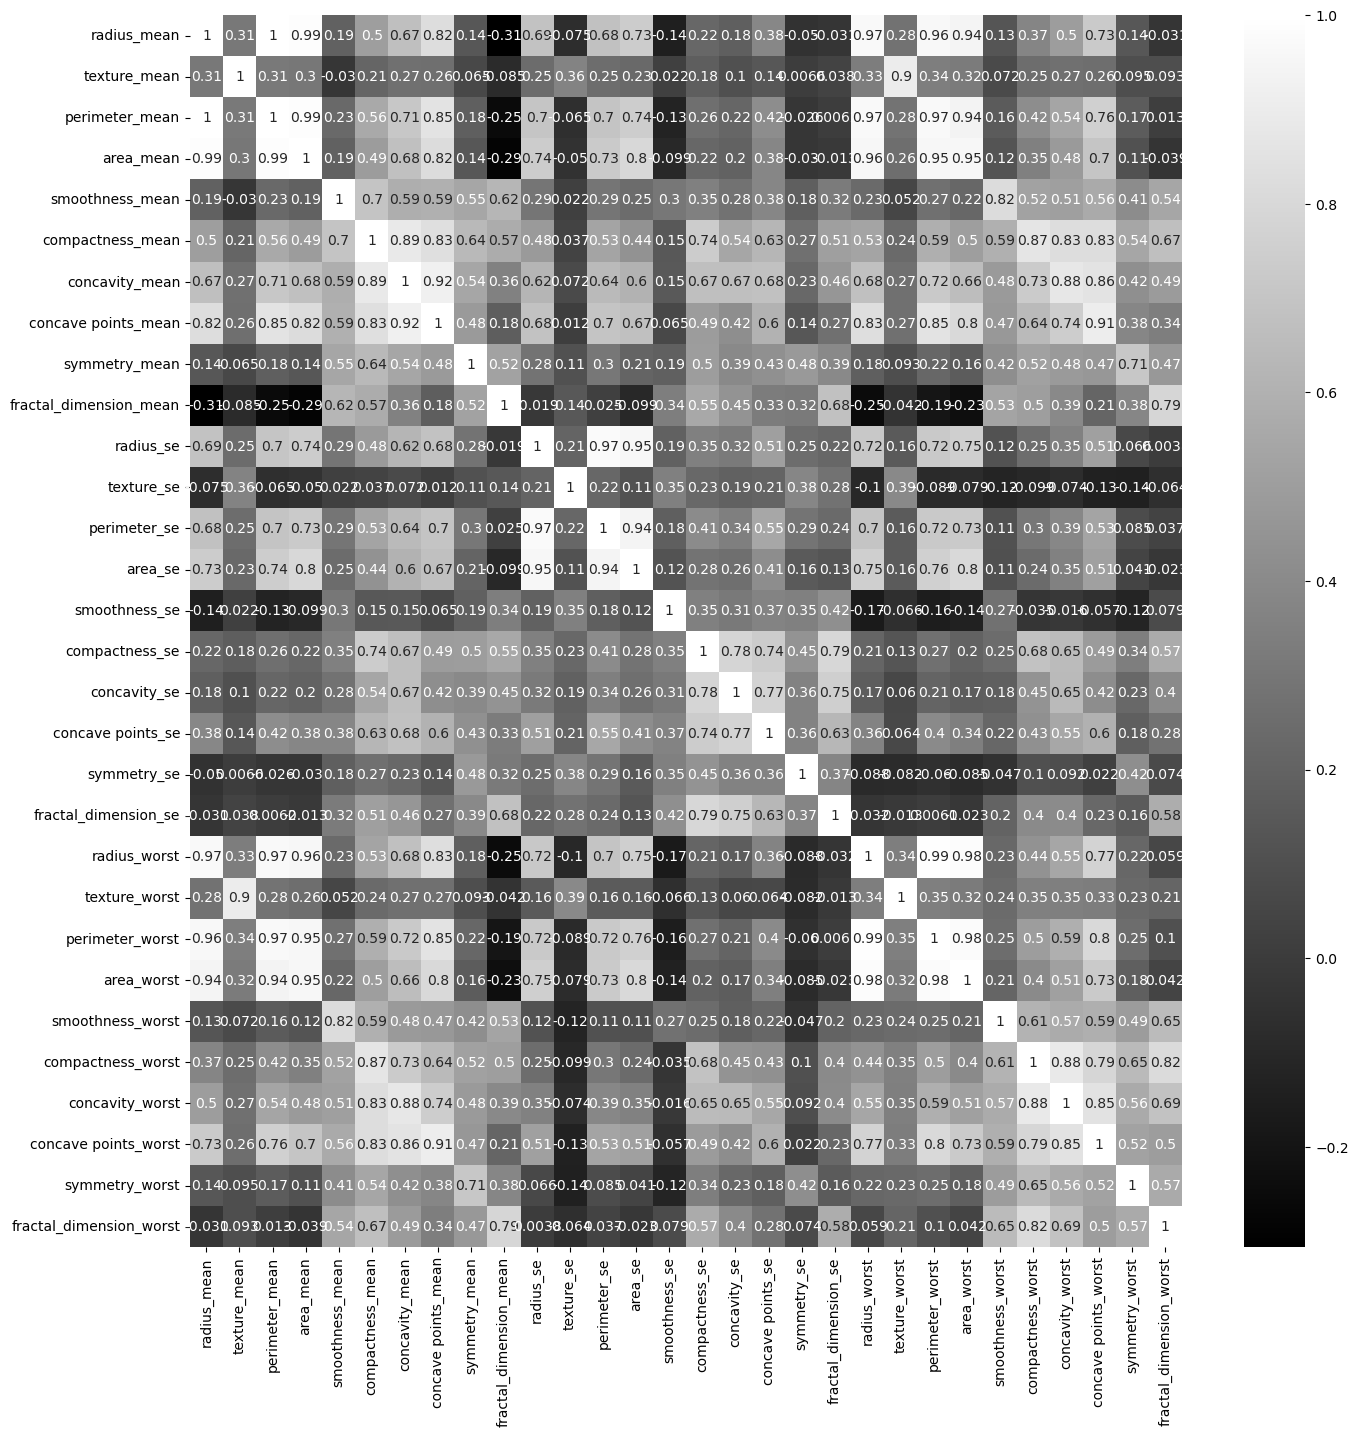

In [402]:
plt.figure(figsize=(16,16))
sns.heatmap(X.corr(), annot=True, cmap='gray', fmt='.2g')
plt.show()

In [403]:
corr_mat = np.corrcoef(X.T)
values, vectors = np.linalg.eig(corr_mat)

In [404]:
values / np.sum(values)

array([0.43977449, 0.19343507, 0.09718649, 0.06666227, 0.04713911,
       0.04202567, 0.02341516, 0.01671778, 0.01362642, 0.0116057 ,
       0.01006063, 0.00907228, 0.00840119, 0.0047237 , 0.00302741,
       0.00233099, 0.00202977, 0.00178102, 0.00162344, 0.00000462,
       0.00002597, 0.00005705, 0.00021636, 0.0002554 , 0.00049877,
       0.00058037, 0.00109892, 0.00099796, 0.00078819, 0.00083779])

In [405]:
n_features = 25
arg_features = np.sort(np.argsort(values)[-n_features:])
# arg_features = np.sort(np.argsort(values)[:7])

In [406]:
X = X.iloc[:,arg_features]

In [407]:
final_df = pd.concat([X,y],axis=1)
final_df.to_feather(os.path.join(DATA_PROCESSED_DIR, 'data.feather'))